In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100) # set to larger value to see all the columns of pd.DF

We will work with a Mercedes-Benz Greener Manufacturing dataset and try different feature engineering, feature selection and dimensionality reduction techniques to predict the time Mercedes-Benz cars spend on the test bench.

First, let's load the data and take a look at the dataset. Target variable to predict is y, the time for testing the car in seconds. We will exclude it from the feature set, as well as a column with unique car id, and split the dataset into training and validation samples.

In [2]:
file_path = "../Data/train_mercedes.csv"
df = pd.read_csv(file_path)
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

y = df["y"]
X = df.drop(["ID", "y"], axis=1)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=1)

---

### Baseline model

As we can see from a simple exploratory analysis, this dataset contains only categorical and ordinal features. Also, there are no missing values in any features. 

Thus, as a very first baseline model, we can just one-hot encode categorical variables and apply linear regression with $l_2$-regularization to predict target variable. 

In [4]:
bin_cols = X_tr.columns[X_tr.dtypes == "int64"].tolist() 
print("Number of binary features =", len(bin_cols))
cat_cols = X_tr.columns[X_tr.dtypes == "object"].tolist()
print("Number of categorical features =", len(cat_cols))

Number of binary features = 368
Number of categorical features = 8


### Check Missing Values

In [5]:
print("Number of columns with any missing values:")
print(X_tr.isnull().any(axis=0).sum())

Number of columns with any missing values:
0


In [6]:
from util import *

In [7]:
from sklearn.linear_model import Ridge
# TEST evaluate_model 
res = evaluate_model(Ridge(), X_tr.iloc[:100, 10:11], y_tr[:100], X_tr.iloc[100:150, 10:11], y_tr[100:150])
print('R2 on train:', res[0])
print('R2 on test:', res[1])

assert np.allclose(
    np.round(evaluate_model(Ridge(), 
                            X_tr.values[:100, 8:16], y_tr.values[:100],
                            X_tr.values[100:150, 8:16], y_tr.values[100:150]), 3), 
    [0.136, 0.094]
)

R2 on train: 0.03454859974270774
R2 on test: -0.02162045646924393


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# your code here
col_transformer = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
],remainder='passthrough')
model = Pipeline([
    ('col_transformer', col_transformer),
    ('estimator', Ridge())
])

In [9]:
# TEST baseline model
print('Column transformers:')
print(col_transformer.transformers)

print('Pipeline:')
print(model.steps[0])
print(model.steps[1])

# test transformers 
assert len(col_transformer.transformers) == 1, 'col_transformer should exactly 1 transformation'
assert isinstance(col_transformer.transformers[0][1], OneHotEncoder), 'col_transformer should use OneHotEncoder'
assert set(col_transformer.transformers[0][2]) == set(cat_cols), 'col_transformer should be applied to all cat_cols'

# test model pipeline
assert isinstance(model.steps[0][1], ColumnTransformer), 'First step of the pipeline should be columns transformer'
assert model.steps[1][0]=='estimator', 'Second step of the pipeline should be named "estimator"'
assert isinstance(model.steps[1][1], Ridge), 'Second step of the pipeline should be Ridge regression'

Column transformers:
[('cat', OneHotEncoder(handle_unknown='ignore'), ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'])]
Pipeline:
('col_transformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                                  'X8'])]))
('estimator', Ridge())


Now we can evaluate the baseline model performance:

In [10]:
R2_tr, R2_te = evaluate_model(model, X_tr, y_tr, X_te, y_te)
print("Train R2 = %.2f" % R2_tr)
print("Test R2 = %.2f" % R2_te)

Train R2 = 0.62
Test R2 = 0.57


As we can see, model performance on the training set is slightly higher than on the test data. This can mean that there is overfitting, which is especially likely when number of features is large.

In [11]:
print("Number of features before one-hot-encoding: ")
print(X_tr.shape[1])
print()
print("Number of features after one-hot-encoding: ")
print(col_transformer.fit_transform(X_tr).shape[1])

Number of features before one-hot-encoding: 
376

Number of features after one-hot-encoding: 
560



As we can see, there were quite a lot of features in the original sample, and after the one-hot encoding of categorical variables, their number increased by almost one and a half times.


To avoid overfitting, it can be helpful to reduce the number of variables by selecting the most important ones. In our sample, all the variables are anonymized. However we can still select the most relevant based not on their physical meaning, but on their observed predictive power and informativeness for the model.

### Filter-based methods
<!-- ### Univariate feature selection (filter-based methods) -->

The most simple group of feature selection approaches are filter-based methods or univariate feature selection. These methods are based on analysis of individual predictive power of each variable. In our case, since we have a regression problem, we can simply check the correlation of each feature with the target variable. 

In `sklearn`, you can find a ready-to-use implementation of univariate feature selection algorithm - `SelectKBest` transformer, which filters out a set of **k** features basen on the values of **scoring function**. 

In [12]:
# TEST get_abs_corr_coef
A = np.array(
    [[1, 0, 0],
     [0, 0.5, -0.5],
     [0, 1, -1]]
)
b = [0, 1, 1]
print(get_abs_corr_coef(A, b))

A = np.array(
    [[1, 0, 0],
     [0, 0.5, -0.5],
     [0, 1, -1]]
)
b = [0, 1, 1]
corr = get_abs_corr_coef(A, b)
assert len(corr) == 3, 'Length of the outut vector should be equal to the number of features'
assert np.all(corr >= 0), 'Function should return absolute values'
assert np.allclose(corr, [1.       ,  0.86603, 0.86603]), 'Correlations are not computed correctly'

[1.        0.8660254 0.8660254]


Now we can check how model performance changes if we use only `k=60` variables with strongest correlation (both positive and negative) with the target variable.

In [13]:
from sklearn.feature_selection import SelectKBest

feat_selector = SelectKBest(get_abs_corr_coef, k=20)
# your code here
model_k_best = Pipeline([
    ('col_transformer',col_transformer),
    ('feat_selector',feat_selector),
    ('estimator',Ridge())
])

In [14]:
# TEST model with filter-based feature selection


print('Pipeline:')
print(model_k_best.steps[0])
print(model_k_best.steps[1])
print(model_k_best.steps[2])

# test model pipeline
assert isinstance(model_k_best.steps[0][1], ColumnTransformer), 'First step of the pipeline should be columns transformer'
assert isinstance(model_k_best.steps[1][1], SelectKBest), 'Second step of the pipeline should be SelectKBest'
assert model_k_best.steps[2][0]=='estimator', 'Third step of the pipeline should be named "estimator"'
assert isinstance(model_k_best.steps[2][1], Ridge), 'Third step of the pipeline should be Ridge regression'

Pipeline:
('col_transformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                                  'X8'])]))
('feat_selector', SelectKBest(k=20, score_func=<function get_abs_corr_coef at 0x000002098C130700>))
('estimator', Ridge())


In [15]:
R2_tr_kbest, R2_te_kbest = evaluate_model(model_k_best, X_tr, y_tr, X_te, y_te)
print("Train R2 = %.2f" % R2_tr_kbest)
print("Test R2 = %.2f" % R2_te_kbest)

Train R2 = 0.51
Test R2 = 0.56


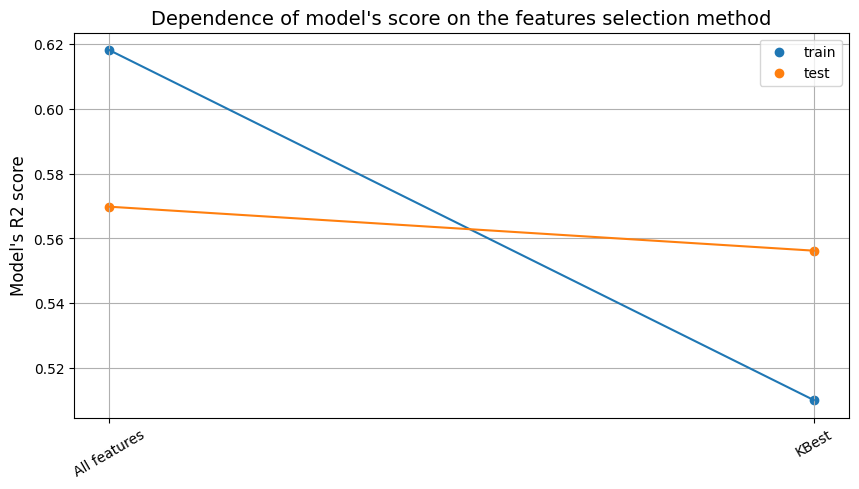

In [16]:
train_scores = [R2_tr, R2_tr_kbest]
test_scores = [R2_te ,R2_te_kbest]
models = ['All features', 'KBest']
 
plt.figure(figsize=(10, 5))
plt.plot(train_scores)
plt.plot(test_scores)
plt.scatter(range(len(models)), train_scores, label="train")
plt.scatter(range(len(models)), test_scores, label="test")
plt.xticks(range(len(models)), models, rotation=30)
plt.ylabel("Model's R2 score", fontdict={"size" : 12})
plt.title("Dependence of model's score on the features selection method", fontdict={"size" : 14})
plt.legend()
plt.grid()
plt.show()

---
## Problem 2. Model hyperparameter tuning  <a class="anchor" id="part2"></a>
---

In the previous task, we used Ridge regression with $l_2$ regularization to predict the target variable. The model hyperparameter `alpha` determines the strength of the regularization, but so far we have used its default value ($alpha = 1$), which may be not optimal. 

In addition, different models may require different degrees of regularization, and it would be incorrect to compare their quality with one fixed value. Now we will optimize the degree of regularization of our regression model.

<!-- Among `sklearn.linear_models`, you can find implementation of the regression models with $l_1$ regularization (`Lasso`), $l_2$ regularization (`Ridge`), as well as their combination (`ElasticNet`). -->

**Grid search** is commonly used to find the optimal value of the regularization coefficient (and other model hyperparameters). For each combination of hyperparameters, a model is trained, and its performance is measured on a validation set or using cross-validation. The set of hyperparameters at which the model achieves the best validation performance is optimal.

Note that the test set on which the final model evaluation is performed should not be used as a validation set for hyperparameter tuning. Otherwise, overfitting occurs and the model quality measured on this test set no longer reflects its predictive ability for the new unseen data. 

`Sklearn` has ready-to-use implementation of grid search - `GridSearchCV` estimator.  It evaluates model performance on cross-validation for each hyperparameter set and selects the best model accordingly.

In [17]:
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-4, 4, 9)
param_grid = {
    "estimator__alpha" : alphas,
}

# your code here
grid_cv = GridSearchCV(model,param_grid,cv=3,scoring='r2')
grid_cv_k_best = GridSearchCV(model_k_best,param_grid,cv=3,scoring='r2')
grid_cv.fit(X_tr,y_tr)
grid_cv_k_best.fit(X_tr,y_tr)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['X0',
                                                                          'X1',
                                                                          'X2',
                                                                          'X3',
                                                                          'X4',
                                                                          'X5',
                                                                          'X6',
                                                                          'X8'])])),
                                       ('feat_selector',
                                        SelectKBest(k=20,
                                                    score_func=<function get_abs_corr_coef at 0x000002098C130700>)),
                                       ('estimator', Ridge(random_state=0))]),
             param_grid={'estimator__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             scoring='r2')

In [18]:
# TEST grid_cv model
assert "estimator__alpha" in grid_cv.param_grid
assert "estimator__alpha" in grid_cv_k_best.param_grid
assert grid_cv.scoring == 'r2'
assert grid_cv_k_best.scoring == 'r2'

assert (grid_cv.param_grid["estimator__alpha"] == np.logspace(-4, 4, 9)).all()
best = grid_cv.best_estimator_
assert isinstance(best.steps[0][1], ColumnTransformer)
assert isinstance(best.steps[1][1], Ridge)

best_k = grid_cv_k_best.best_estimator_
assert isinstance(best_k.steps[0][1], ColumnTransformer)
assert isinstance(best_k.steps[1][1], SelectKBest)
assert isinstance(best_k.steps[2][1], Ridge)


- Plot the dependence of the models' validation performances on the alpha value and visually compare how the quality of each model depends on the regularization degree.

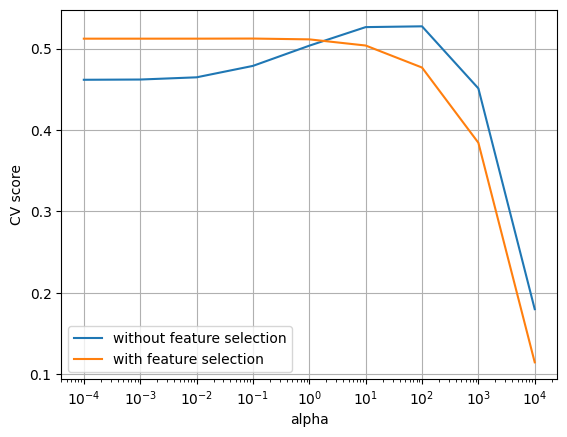

Without feature selection:
Optimal alpha  = 100.0000
Optimal R2 score = 0.5273

With feature selection:
Optimal alpha  = 0.1000
Optimal R2 score = 0.5122


In [19]:
scores = grid_cv.cv_results_['mean_test_score']
plt.plot(alphas, scores, label="without feature selection")
scores_k_best = grid_cv_k_best.cv_results_['mean_test_score']
plt.plot(alphas, scores_k_best, label="with feature selection")

plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.grid()
plt.legend()
plt.show()

print("Without feature selection:")
print("Optimal alpha  = %.4f" % grid_cv.best_params_['estimator__alpha'])
print("Optimal R2 score = %.4f" % grid_cv.best_score_)
print()
print("With feature selection:")
print("Optimal alpha  = %.4f" % grid_cv_k_best.best_params_['estimator__alpha'])
print("Optimal R2 score = %.4f" % grid_cv_k_best.best_score_)

- Select the better model, fix the optimal value of the regularization coefficient, fit it on the training set, and estimate its performance on the test set `X_te`. 

In [20]:
model = grid_cv_k_best.best_estimator_
R2_tr, R2_te = evaluate_model(model, X_tr, y_tr, X_te, y_te)

print("Train R2 = %.2f" % R2_tr)
print("Test R2 = %.2f" % R2_te)

Train R2 = 0.51
Test R2 = 0.56


Also, we can perform the search of optimal number of selected features `k`. However, the optimal strength of regularization will also depend on the number of selected features, since models with larger number of features usually need stronger regularization. Thus, it is a good idea to perform grid search for two these parameters simultaneously.

<!-- Also, we can still assume that some of the features generated by the one-hot encoding of categorical variables are redundant. In this case, you may want to use a $l_1$ -regularization, which is more likely to assign exactly zero weights to insignificant variables. Thus, an internal feature selection by importance is performed, and the final model depends on a smaller number of variables.

Among `sklearn.linear_models`, you can find implementation of the regression models with $l_1$ regularization (`Lasso`), $l_2$ regularization (`Ridge`), as well as their combination (`ElasticNet`). -->

The below cell is long running. Uncomment to run the hyperparameter procedure

In [21]:
"""
model_k_best.set_params(estimator__random_state=0);
alphas = np.logspace(-4, 4, 9)
ks = np.arange(20, 310, 30)
alphas = np.array([1.0])
ks = np.array([80])
param_grid = {
    "estimator__alpha" : alphas,
    "feat_selector__k" : ks
}

# your code here
grid_cv_k_best = GridSearchCV(model_k_best,param_grid,cv=3,scoring='r2')
grid_cv_k_best.fit(X_tr,y_tr)
"""

'\nmodel_k_best.set_params(estimator__random_state=0);\nalphas = np.logspace(-4, 4, 9)\nks = np.arange(20, 310, 30)\nalphas = np.array([1.0])\nks = np.array([80])\nparam_grid = {\n    "estimator__alpha" : alphas,\n    "feat_selector__k" : ks\n}\n\n# your code here\ngrid_cv_k_best = GridSearchCV(model_k_best,param_grid,cv=3,scoring=\'r2\')\ngrid_cv_k_best.fit(X_tr,y_tr)\n'

In [22]:
model_k_best.set_params(estimator__random_state=0);
#alphas = np.logspace(-4, 4, 9)
#ks = np.arange(20, 310, 30)
alphas = np.array([1.0])
ks = np.array([80])
param_grid = {
    "estimator__alpha" : alphas,
    "feat_selector__k" : ks
}

# your code here
grid_cv_k_best = GridSearchCV(model_k_best,param_grid,cv=3,scoring='r2')
grid_cv_k_best.fit(X_tr,y_tr)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['X0',
                                                                          'X1',
                                                                          'X2',
                                                                          'X3',
                                                                          'X4',
                                                                          'X5',
                                                                          'X6',
                                                                          'X8'])])),
                                       ('feat_selector',
                                        SelectKBest(k=20,
                                                    score_func=<function get_abs_corr_coef at 0x000002098C130700>)),
                                       ('estimator', Ridge(random_state=0))]),
             param_grid={'estimator__alpha': array([1.]),
                         'feat_selector__k': array([80])},
             scoring='r2')

In [23]:
print('Best pipeline:')
print(grid_cv_k_best.best_estimator_.steps[0])
print(grid_cv_k_best.best_estimator_.steps[1])
print(grid_cv_k_best.best_estimator_.steps[2])

best_k = grid_cv_k_best.best_estimator_
assert isinstance(best_k.steps[0][1], ColumnTransformer)
assert isinstance(best_k.steps[1][1], SelectKBest)
assert isinstance(best_k.steps[2][1], Ridge)

Best pipeline:
('col_transformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                                  'X8'])]))
('feat_selector', SelectKBest(k=80, score_func=<function get_abs_corr_coef at 0x000002098C130700>))
('estimator', Ridge(random_state=0))


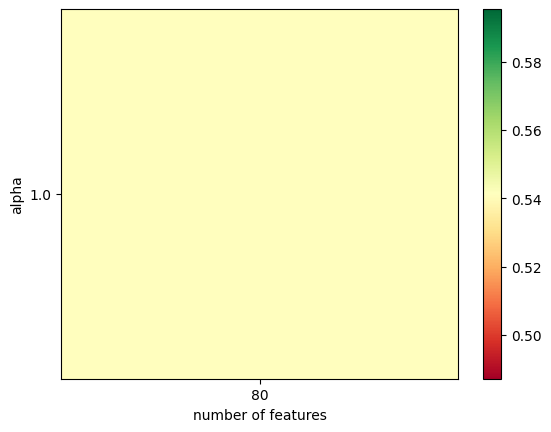

Optimal alpha  = 1.0000
Optimal number of features  = 80.0000
Optimal R2 score = 0.5413


In [24]:
scores = grid_cv_k_best.cv_results_['mean_test_score']
heatmap = plt.pcolor(scores.reshape(len(alphas), len(ks)), cmap="RdYlGn")
plt.colorbar(heatmap)
plt.xticks(np.arange(len(ks)) + 0.5, ks)
plt.xlabel("number of features")
plt.yticks(np.arange(len(alphas)) + 0.5, alphas)
plt.ylabel("alpha")
plt.show()

print("Optimal alpha  = %.4f" % grid_cv_k_best.best_estimator_.steps[2][1].alpha)
print("Optimal number of features  = %.4f" % grid_cv_k_best.best_estimator_.steps[1][1].k)
print("Optimal R2 score = %.4f" % grid_cv_k_best.best_score_)

In [25]:
# fit the best model and evaluate performance on test set
best_model = grid_cv_k_best.best_estimator_
R2_tr, R2_te = evaluate_model(best_model, X_tr, y_tr, X_te, y_te)
print("Train R2 = %.2f" % R2_tr)
print("Test R2 = %.2f" % R2_te)

Train R2 = 0.56
Test R2 = 0.61


In [26]:
import joblib
joblib.dump(best_model, '../model.pkl', compress = 1)

['../model.pkl']

### Prepare Random Evaluation Set

In [27]:
test_set = X_te.sample(1,random_state=42)
test_set.to_csv('../eval_set.csv',index=False)